In [2]:
import sys
sys.path.append('../../')

import pandas as pd
import niimpy 
import niimpy.preprocessing.communication as comm
import niimpy.preprocessing.battery as batt
import niimpy.preprocessing.screen as screen
import datetime
import config
from analysis import rhythms
from niimpy.exploration.eda import lineplot

# Load data
Example with call dataExample with call data

In [3]:
path = config.MULTIUSER_AWARE_CALLS_PATH
df = niimpy.read_csv(path, tz='Europe/Helsinki')
df.head()

,user,device,time,call_type,call_duration,datetime
2020-01-09 02:08:03.896000147+02:00,jd9INuQ5BBlW,3p83yASkOb_B,1.578528e+09,incoming,1079,2020-01-09 02:08:03.896000147+02:00
2020-01-09 02:49:44.968999863+02:00,jd9INuQ5BBlW,3p83yASkOb_B,1.578531e+09,outgoing,174,2020-01-09 02:49:44.968999863+02:00
2020-01-09 02:22:57.168999910+02:00,jd9INuQ5BBlW,3p83yASkOb_B,1.578529e+09,outgoing,890,2020-01-09 02:22:57.168999910+02:00
2020-01-09 02:27:21.187000036+02:00,jd9INuQ5BBlW,3p83yASkOb_B,1.578530e+09,outgoing,1342,2020-01-09 02:27:21.187000036+02:00
2020-01-09 02:47:16.177000046+02:00,jd9INuQ5BBlW,3p83yASkOb_B,1.578531e+09,incoming,645,2020-01-09 02:47:16.177000046+02:00


# Extract features
You can use niimpy to extract the features. Otherwise, you have to make sure that the data

In [132]:
timebin = '1H'
wrapper_features1 = {comm.call_count:{"communication_column_name":"call_duration",
                                              "resample_args":{"rule": timebin}},
                            comm.call_duration_total:{"communication_column_name":"call_duration",
                                                      "resample_args":{"rule":timebin}}
                            }
results = comm.extract_features_comms(df, features=wrapper_features1)
        
# Reset index and extract date
results = results.reset_index().rename(columns={'level_1': 'time'}).set_index('time')

results.head()

computing <function call_count at 0x2b0d49051560>...
computing <function call_duration_total at 0x2b0d1f6c4ef0>...


,user,outgoing_count,incoming_count,missed_count,outgoing_duration_total,incoming_duration_total,missed_duration_total
time,,,,,,,
2019-08-08 22:00:00+03:00,iGyXetHE3S8u,0.0,5.0,0.0,0.0,4409.0,0.0
2019-08-08 23:00:00+03:00,iGyXetHE3S8u,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-09 00:00:00+03:00,iGyXetHE3S8u,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-09 01:00:00+03:00,iGyXetHE3S8u,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-09 02:00:00+03:00,iGyXetHE3S8u,0.0,0.0,0.0,0.0,0.0,0.0


# Calculate rhythms
Calculate rhythms of the count of outgoing and incoming calls

In [143]:
rhythms_df = compute_rhythms(results, timebin='2H', cols=['outgoing_count', 'incoming_count'], groupby_cols=['user'], period=2*24, freq='daily' )
rhythms_df

,outgoing_count,incoming_count,missed_count,outgoing_duration_total,incoming_duration_total,missed_duration_total,user,outgoing_count_distr,incoming_count_distr
time,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,iGyXetHE3S8u,0.0,0.00
2,0.0,0.0,0.0,0.0,0.0,0.0,iGyXetHE3S8u,0.0,0.00
4,0.0,0.0,0.0,0.0,0.0,0.0,iGyXetHE3S8u,0.0,0.00
6,2.0,2.0,1.0,2281.0,1824.0,0.0,iGyXetHE3S8u,0.5,0.50
8,0.0,1.0,0.0,0.0,131.0,0.0,iGyXetHE3S8u,0.0,0.25
10,0.0,0.0,0.0,0.0,0.0,0.0,iGyXetHE3S8u,0.0,0.00
12,0.0,0.0,0.0,0.0,0.0,0.0,iGyXetHE3S8u,0.0,0.00
14,2.0,1.0,0.0,2726.0,1298.0,0.0,iGyXetHE3S8u,0.5,0.25
16,0.0,0.0,0.0,0.0,0.0,0.0,iGyXetHE3S8u,0.0,0.00


# Visualization

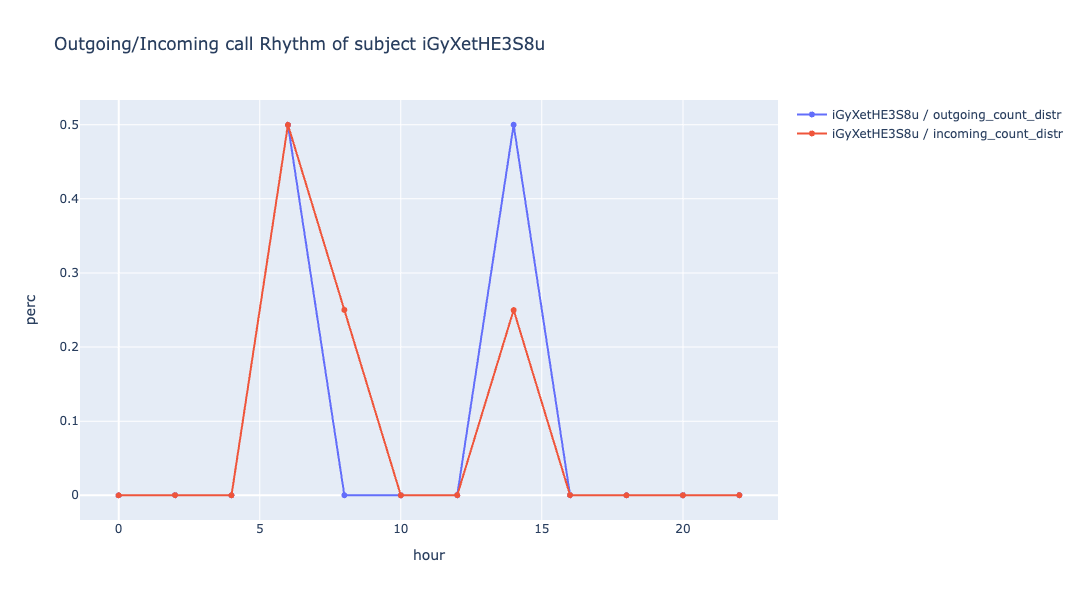

In [150]:
fig = lineplot.timeplot(rhythms_df,
                        users=['iGyXetHE3S8u'],
                        columns=['outgoing_count_distr', 'incoming_count_distr'],
                        title='Outgoing/Incoming call Rhythm of subject {}'.format('iGyXetHE3S8u'),
                        xlabel='hour',
                        ylabel='perc')

fig.show()

In [16]:
path = config.MULTIUSER_AWARE_MESSAGES_PATH
df = niimpy.read_csv(path, tz='Europe/Helsinki')
df.head()

sms = comm.sms_count(df, feature_functions={})
        
# Reset index and extract date
sms = sms.reset_index().rename(columns={'level_1': 'time'}).set_index('time')

sms

,user,outgoing_count,incoming_count
time,,,
2019-08-13 08:30:00+03:00,iGyXetHE3S8u,1,1.0
2019-08-13 09:00:00+03:00,iGyXetHE3S8u,0,0.0
2019-08-13 09:30:00+03:00,iGyXetHE3S8u,2,1.0
2019-08-13 10:00:00+03:00,iGyXetHE3S8u,0,0.0
2019-08-13 10:30:00+03:00,iGyXetHE3S8u,0,0.0
...,...,...,...
2020-01-09 12:00:00+02:00,jd9INuQ5BBlW,0,0.0
2020-01-09 12:30:00+02:00,jd9INuQ5BBlW,0,3.0
2020-01-09 13:00:00+02:00,jd9INuQ5BBlW,0,0.0
